In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('IL-clean.csv.gz',compression='gzip',low_memory=False)

In [3]:
data.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,vehicle_type,drugs_related_stop,district
0,IL-2004-000001,IL,2004-01-01,00:02,ILLINOIS STATE POLICE 17,NaN,NaN,17,Illinois State Police,F,...,False,NaN,NaN,False,Written Warning,NaN,NaN,Olds 2000,NaN,ILLINOIS STATE POLICE 17
1,IL-2004-000002,IL,2004-01-01,00:07,ILLINOIS STATE POLICE 07,NaN,NaN,07,Illinois State Police,M,...,False,NaN,NaN,False,Written Warning,NaN,NaN,Linc 1990,NaN,ILLINOIS STATE POLICE 07
2,IL-2004-000003,IL,2004-01-01,00:14,ILLINOIS STATE POLICE 11,NaN,NaN,11,Illinois State Police,M,...,False,NaN,NaN,False,Citation,NaN,NaN,Chev 1996,NaN,ILLINOIS STATE POLICE 11
3,IL-2004-000004,IL,2004-01-01,00:15,ILLINOIS STATE POLICE 03,Cook County,17031.0,03,Illinois State Police,F,...,False,NaN,NaN,False,Citation,NaN,NaN,Buic 1992,NaN,ILLINOIS STATE POLICE 03
4,IL-2004-000005,IL,2004-01-01,00:15,ILLINOIS STATE POLICE 09,NaN,NaN,09,Illinois State Police,F,...,False,NaN,NaN,False,Citation,NaN,NaN,Olds 1996,NaN,ILLINOIS STATE POLICE 09


In [4]:
data.dtypes

id                        object
state                     object
stop_date                 object
stop_time                 object
location_raw              object
county_name               object
county_fips              float64
fine_grained_location     object
police_department         object
driver_gender             object
driver_age_raw           float64
driver_age               float64
driver_race_raw           object
driver_race               object
violation_raw             object
violation                 object
search_conducted            bool
search_type_raw           object
search_type               object
contraband_found            bool
stop_outcome              object
is_arrested              float64
stop_duration            float64
vehicle_type              object
drugs_related_stop        object
district                  object
dtype: object

In [4]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715031 entries, 0 to 4715030
Data columns (total 26 columns):
id                       object
state                    object
stop_date                object
stop_time                object
location_raw             object
county_name              object
county_fips              float64
fine_grained_location    object
police_department        object
driver_gender            object
driver_age_raw           float64
driver_age               float64
driver_race_raw          object
driver_race              object
violation_raw            object
violation                object
search_conducted         bool
search_type_raw          object
search_type              object
contraband_found         bool
stop_outcome             object
is_arrested              float64
stop_duration            float64
vehicle_type             object
drugs_related_stop       object
district                 object
dtypes: bool(2), float64(5), object(19)
memory usage: 

In [5]:
data.dropna(axis='columns',how='all',inplace=True)

In [6]:
data.stop_date = data.stop_date.str.cat(data.stop_time,sep=' ')

In [7]:
data.stop_date = pd.to_datetime(data.stop_date)

In [8]:
data.stop_date.head()

0   2004-01-01 00:02:00
1   2004-01-01 00:07:00
2   2004-01-01 00:14:00
3   2004-01-01 00:15:00
4   2004-01-01 00:15:00
Name: stop_date, dtype: datetime64[ns]

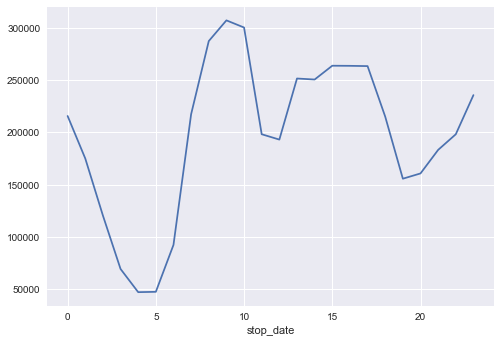

In [8]:
plt.style.use('seaborn')
data.groupby(data.stop_date.dt.hour).violation.count().plot()

In [7]:
data.groupby(data.stop_date.dt.hour).violation.value_counts().unstack()

violation,Equipment,License,Moving violation,Other,Registration/plates,Safe movement,Seat belt,Speeding
stop_date,,,,,,,,
0.0,47383,4439,33844,1961,4697,22537,2070,98759
1.0,35298,3343,29203,1766,3521,20328,1530,80050
2.0,21202,2010,21683,1386,2182,15004,994,55942
3.0,10341,1026,13159,966,1001,8493,501,33763
4.0,6503,537,8096,815,584,5137,290,25071
5.0,5981,523,7240,741,575,4252,387,27664
6.0,14172,1288,13687,1977,1974,7894,1278,50025
7.0,45017,3184,29919,5498,4646,14794,5206,109165
8.0,63808,4061,38011,9062,6035,16645,6894,142907


In [ ]:
data.describe()

In [40]:
data.isnull().sum()

id                             0
state                          0
stop_date                   2331
stop_time                   2331
location_raw                 266
county_name              4240169
county_fips              4240169
fine_grained_location        266
police_department              0
driver_gender                  0
driver_age_raw                 0
driver_age                  2932
driver_race_raw                0
driver_race                    0
violation_raw                  0
violation                      0
search_conducted               0
search_type_raw          4529411
search_type              4562575
contraband_found               0
stop_outcome                   0
stop_duration            1286028
vehicle_type                   0
drugs_related_stop       2244026
district                     266
dtype: int64

In [8]:
data.groupby('driver_race').search_conducted.value_counts(normalize=True)

driver_race  search_conducted
Asian        False               0.977075
             True                0.022925
Black        False               0.918592
             True                0.081408
Hispanic     False               0.911525
             True                0.088475
Other        False               0.966638
             True                0.033362
White        False               0.974061
             True                0.025939
Name: search_conducted, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000355DD358>,
      dtype=object)

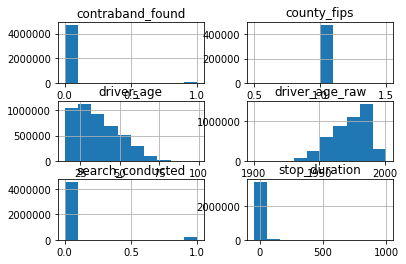

In [10]:
data.hist()

In [9]:
data.county_name.unique()

array([nan, 'Cook County'], dtype=object)

In [10]:
data.county_fips.unique()

array([   nan, 17031.])

In [11]:
data.drop(['county_name','county_fips'],axis='columns',inplace=True)

In [12]:
data.search_type.unique()

array([nan, 'Incident to Arrest', 'Consent', 'Reasonable Suspicion',
       'Probable Cause', 'Other', 'K9 Search'], dtype=object)

In [13]:
data.drugs_related_stop.unique()

array([nan, True, False], dtype=object)

In [14]:
data.drugs_related_stop.fillna(value=False,inplace=True)

In [15]:
data.isnull().sum()

id                             0
state                          0
stop_date                   2331
stop_time                   2331
location_raw                 266
fine_grained_location        266
police_department              0
driver_gender                  0
driver_age_raw                 0
driver_age                  2932
driver_race_raw                0
driver_race                    0
violation_raw                  0
violation                      0
search_conducted               0
search_type_raw          4529411
search_type              4562575
contraband_found               0
stop_outcome                   0
stop_duration            1286028
vehicle_type                   0
drugs_related_stop             0
district                     266
dtype: int64

In [16]:
data.district.unique()

array(['ILLINOIS STATE POLICE 17', 'ILLINOIS STATE POLICE 07',
       'ILLINOIS STATE POLICE 11', 'ILLINOIS STATE POLICE 03',
       'ILLINOIS STATE POLICE 09', 'ILLINOIS STATE POLICE 08',
       'ILLINOIS STATE POLICE 15', 'ILLINOIS STATE POLICE 22',
       'ILLINOIS STATE POLICE 05', 'ILLINOIS STATE POLICE 02',
       'ILLINOIS STATE POLICE 10', 'ILLINOIS STATE POLICE 16',
       'ILLINOIS STATE POLICE 06', 'ILLINOIS STATE POLICE 20',
       'ILLINOIS STATE POLICE 19', 'ILLINOIS STATE POLICE 13',
       'ILLINOIS STATE POLICE 18', 'ILLINOIS STATE POLICE 12',
       'ILLINOIS STATE POLICE 21', 'ILLINOIS STATE POLICE 01',
       'ILLINOIS STATE POLICE 14', 'ILLINOIS STATE POLICE 04', nan,
       'ILLINOIS STATE POLICE 00', 'ILLINOIS STATE POLICE Z2'],
      dtype=object)

In [17]:
data.district.fillna(value='NA',inplace=True)

In [20]:
tmp = data.district.str[-2:]

In [22]:
tmp.shape

(4715031,)

In [23]:
data.district.head(20)

0     ILLINOIS STATE POLICE 17
1     ILLINOIS STATE POLICE 07
2     ILLINOIS STATE POLICE 11
3     ILLINOIS STATE POLICE 03
4     ILLINOIS STATE POLICE 09
5     ILLINOIS STATE POLICE 09
6     ILLINOIS STATE POLICE 08
7     ILLINOIS STATE POLICE 15
8     ILLINOIS STATE POLICE 15
9     ILLINOIS STATE POLICE 22
10    ILLINOIS STATE POLICE 08
11    ILLINOIS STATE POLICE 22
12    ILLINOIS STATE POLICE 08
13    ILLINOIS STATE POLICE 11
14    ILLINOIS STATE POLICE 09
15    ILLINOIS STATE POLICE 09
16    ILLINOIS STATE POLICE 11
17    ILLINOIS STATE POLICE 07
18    ILLINOIS STATE POLICE 08
19    ILLINOIS STATE POLICE 08
Name: district, dtype: object

In [47]:
str = 'ILLINOIS STATE POLICE 17'

In [66]:
str[-2:24]

'17'

In [24]:
tmp.isnull().sum()

0

In [25]:
data.district = tmp

In [29]:
data.isnull().sum()

id                             0
state                          0
stop_date                      0
stop_time                      0
location_raw                 266
fine_grained_location        266
police_department              0
driver_gender                  0
driver_age_raw                 0
driver_age                  2930
driver_race_raw                0
driver_race                    0
violation_raw                  0
violation                      0
search_conducted               0
search_type_raw          4527284
search_type              4560448
contraband_found               0
stop_outcome                   0
stop_duration            1283697
vehicle_type                   0
drugs_related_stop             0
district                       0
dtype: int64

In [27]:
data.dropna(subset=['stop_date'],inplace=True)

In [31]:
data.head()

,id,state,stop_date,stop_time,location_raw,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,stop_duration,vehicle_type,drugs_related_stop,district
0,IL-2004-000001,IL,2004-01-01 00:02:00,00:02,ILLINOIS STATE POLICE 17,17,Illinois State Police,F,1963.0,41.0,...,Speeding,False,NaN,NaN,False,Written Warning,NaN,Olds 2000,False,17
1,IL-2004-000002,IL,2004-01-01 00:07:00,00:07,ILLINOIS STATE POLICE 07,07,Illinois State Police,M,1987.0,17.0,...,Safe movement,False,NaN,NaN,False,Written Warning,NaN,Linc 1990,False,07
2,IL-2004-000003,IL,2004-01-01 00:14:00,00:14,ILLINOIS STATE POLICE 11,11,Illinois State Police,M,1981.0,23.0,...,Speeding,False,NaN,NaN,False,Citation,NaN,Chev 1996,False,11
3,IL-2004-000004,IL,2004-01-01 00:15:00,00:15,ILLINOIS STATE POLICE 03,03,Illinois State Police,F,1972.0,32.0,...,Moving violation,False,NaN,NaN,False,Citation,NaN,Buic 1992,False,03
4,IL-2004-000005,IL,2004-01-01 00:15:00,00:15,ILLINOIS STATE POLICE 09,09,Illinois State Police,F,1980.0,24.0,...,Moving violation,False,NaN,NaN,False,Citation,NaN,Olds 1996,False,09


In [28]:
data.shape

(4712700, 23)

In [48]:
data.to_csv('ETL_police.csv.gzip',compression='gzip',chunksize=100000)

In [53]:
data.to_csv('ETL_police.csv.bz2',compression='bz2',index=False)

In [3]:
data = pd.read_csv('ETL_police2.csv.bz2',compression='bz2',low_memory=False)

In [4]:
data.head()

,id,state,stop_date,stop_time,location_raw,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,stop_duration,vehicle_type,drugs_related_stop,district
0,IL-2004-000001,IL,2004-01-01 00:02:00,00:02,ILLINOIS STATE POLICE 17,17,Illinois State Police,F,1963.0,41.0,...,Speeding,False,NaN,NaN,False,Written Warning,NaN,Olds 2000,False,False
1,IL-2004-000002,IL,2004-01-01 00:07:00,00:07,ILLINOIS STATE POLICE 07,07,Illinois State Police,M,1987.0,17.0,...,Safe movement,False,NaN,NaN,False,Written Warning,NaN,Linc 1990,False,False
2,IL-2004-000003,IL,2004-01-01 00:14:00,00:14,ILLINOIS STATE POLICE 11,11,Illinois State Police,M,1981.0,23.0,...,Speeding,False,NaN,NaN,False,Citation,NaN,Chev 1996,False,False
3,IL-2004-000004,IL,2004-01-01 00:15:00,00:15,ILLINOIS STATE POLICE 03,03,Illinois State Police,F,1972.0,32.0,...,Moving violation,False,NaN,NaN,False,Citation,NaN,Buic 1992,False,False
4,IL-2004-000005,IL,2004-01-01 00:15:00,00:15,ILLINOIS STATE POLICE 09,09,Illinois State Police,F,1980.0,24.0,...,Moving violation,False,NaN,NaN,False,Citation,NaN,Olds 1996,False,False


In [56]:
data.shape

(4712700, 23)

In [57]:
data.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw',
       'fine_grained_location', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'stop_duration',
       'vehicle_type', 'drugs_related_stop', 'district'],
      dtype='object')

In [62]:
data.isnull().sum()

id                             0
state                          0
stop_date                      0
stop_time                      0
location_raw                 266
fine_grained_location        266
police_department              0
driver_gender                  0
driver_age_raw                 0
driver_age                     0
driver_race_raw                0
driver_race                    0
violation_raw                  0
violation                      0
search_conducted               0
search_type_raw          4524462
search_type                    0
contraband_found               0
stop_outcome                   0
stop_duration            1282866
vehicle_type                   0
drugs_related_stop             0
district                       0
dtype: int64

In [32]:
data.dropna(subset=['driver_age'],inplace=True)

In [33]:
data.search_type.fillna(value='None',inplace=True)

In [2]:
data.to_csv('ETL_police2.csv.bz2',compression='bz2',index=False)

NameError: name 'data' is not defined

In [34]:
data.district.head()

0    17
1    07
2    11
3    03
4    09
Name: district, dtype: object

In [37]:
import seaborn as sns

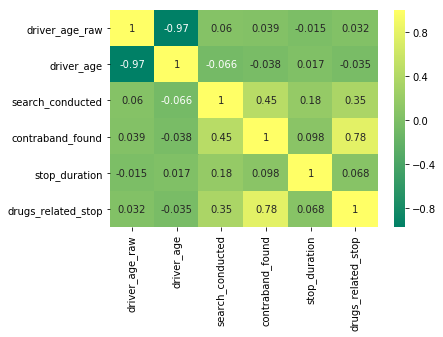

In [42]:
sns.heatmap(data[:].corr(),cmap='summer',annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001D3B12E8>,
      dtype=object)

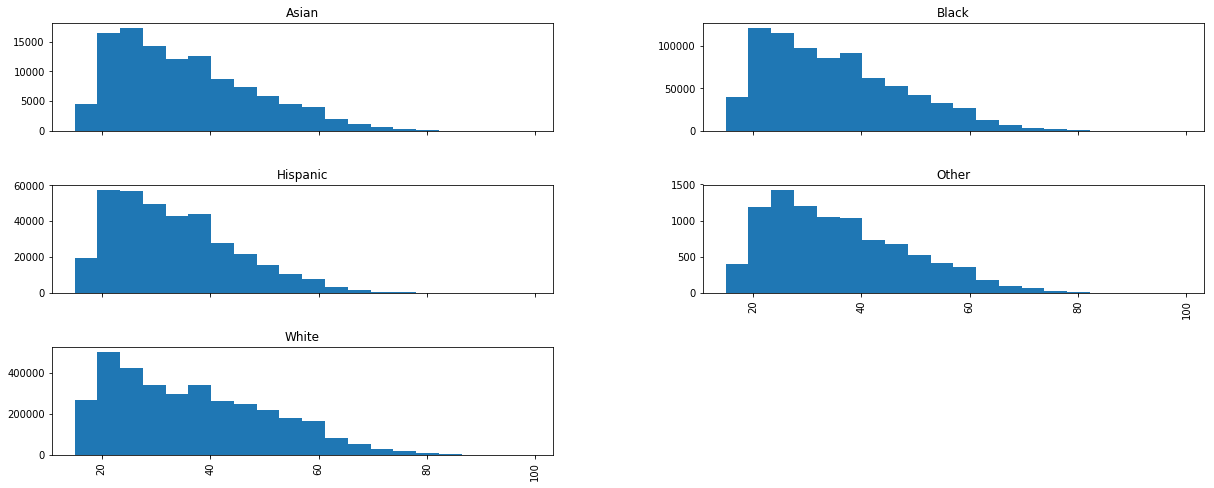

In [19]:
data.driver_age.hist(by=data.driver_race,sharex=True,figsize=(20,8),bins=20)

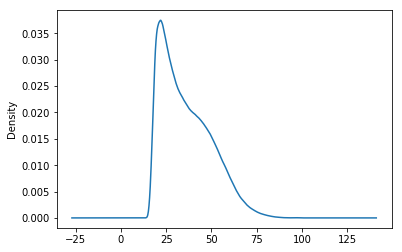

In [20]:
data.driver_age.plot.kde()

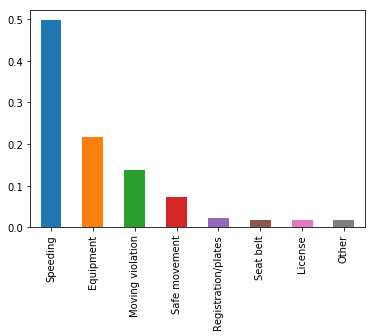

In [14]:
data.violation.value_counts(normalize=True).plot(kind='bar')

In [17]:
data.stop_outcome.value_counts(normalize=True)

Citation           0.564035
Written Warning    0.423241
Verbal Warning     0.012724
Name: stop_outcome, dtype: float64

In [23]:
data.groupby('driver_race').apply(pd.DataFrame.describe)

driver_age_raw    driver_age  stop_duration
driver_race                                                   
Asian       count    1.116430e+05  1.116430e+05   8.463000e+04
            mean     1.974126e+03  3.530761e+01   1.421043e+01
            std      1.284783e+01  1.256939e+01   1.347667e+01
            min      1.908000e+03  1.500000e+01  -2.400000e+01
            25%      1.966000e+03  2.500000e+01   1.000000e+01
            50%      1.977000e+03  3.300000e+01   1.200000e+01
            75%      1.984000e+03  4.400000e+01   1.500000e+01
            max      1.999000e+03  9.900000e+01   9.990000e+02
Black       count    7.950240e+05  7.950240e+05   5.878870e+05
            mean     1.974172e+03  3.510697e+01   1.609885e+01
            std      1.295539e+01  1.259005e+01   1.635426e+01
            min      1.905000e+03  1.500000e+01  -3.500000e+01
            25%      1.966000e+03  2.500000e+01   1.000000e+01
            50%      1.976000e+03  3.300000e+01   1.500000e+01
            75%      1.984000e+03  4.300000e+01   1.500000e+01
            max      2.000000e+03  9.900000e+01   9.990000e+02
Hispanic    count    3.597810e+05  3.597810e+05   2.677050e+05
            mean     1.975867e+03  3.342618e+01   1.758508e+01
            std      1.143962e+01  1.123730e+01   1.639243e+01
            min      1.905000e+03  1.500000e+01  -1.700000e+01
            25%      1.969000e+03  2.400000e+01   1.000000e+01
            50%      1.978000e+03  3.100000e+01   1.500000e+01
            75%      1.985000e+03  4.000000e+01   2.000000e+01
            max      2.000000e+03  9.900000e+01   9.990000e+02
Other       count    9.363000e+03  9.363000e+03   6.839000e+03
            mean     1.973475e+03  3.594938e+01   1.498055e+01
            std      1.309945e+01  1.276130e+01   1.503127e+01
            min      1.908000e+03  1.500000e+01   1.000000e+00
            25%      1.965000e+03  2.600000e+01   1.000000e+01
            50%      1.976000e+03  3.300000e+01   1.400000e+01
            75%      1.984000e+03  4.500000e+01   1.500000e+01
            max      1.999000e+03  9.900000e+01   9.990000e+02
White       count    3.433959e+06  3.433959e+06   2.479843e+06
            mean     1.972294e+03  3.663609e+01   1.465019e+01
            std      1.448562e+01  1.434191e+01   1.565915e+01
            min      1.905000e+03  1.500000e+01  -4.500000e+01
            25%      1.962000e+03  2.400000e+01   1.000000e+01
            50%      1.975000e+03  3.400000e+01   1.200000e+01
            75%      1.984000e+03  4.700000e+01   1.500000e+01
            max      2.000000e+03  9.900000e+01   9.990000e+02

In [53]:
d = pd.DataFrame(data.groupby('driver_race').drugs_related_stop.value_counts(normalize=True))

## 经典：

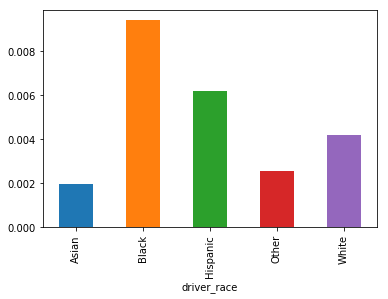

In [68]:
data.groupby('driver_race').drugs_related_stop.value_counts(normalize=True).unstack().iloc[:,1].plot(kind='bar')

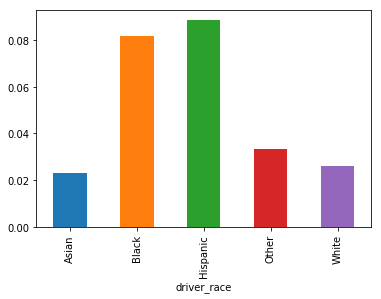

In [81]:
data.groupby('driver_race').search_conducted.value_counts(normalize=True).unstack().iloc[:,1].plot(kind='bar')

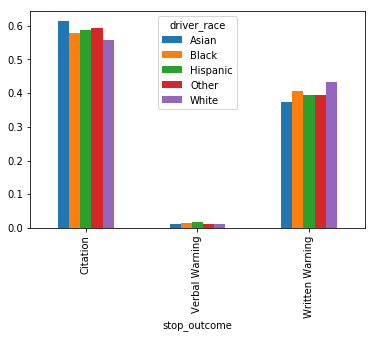

In [88]:
data.groupby('driver_race').stop_outcome.value_counts(normalize=True).unstack(level=0).plot(kind='bar')

In [90]:
data.groupby('driver_race').stop_outcome.value_counts(normalize=True).unstack(level=0)

driver_race,Asian,Black,Hispanic,Other,White
stop_outcome,,,,,
Citation,0.614163,0.579733,0.587107,0.593934,0.556272
Verbal Warning,0.011761,0.013852,0.016941,0.011748,0.012055
Written Warning,0.374076,0.406414,0.395952,0.394318,0.431673


In [95]:
data.groupby('driver_race').stop_outcome.value_counts(normalize=True).unstack().describe()

stop_outcome,Citation,Verbal Warning,Written Warning
count,5.000000,5.000000,5.000000
mean,0.586242,0.013271,0.400487
std,0.021095,0.002230,0.020999
min,0.556272,0.011748,0.374076
25%,0.579733,0.011761,0.394318
50%,0.587107,0.012055,0.395952
75%,0.593934,0.013852,0.406414
max,0.614163,0.016941,0.431673
